In [834]:
import pandas as pd
import numpy as np
item_info_df = pd.read_csv("C:/Users/hwang/3rd_grade_1/SMART_AI/term_project/AirPollutionSeoul/Original Data/Measurement_item_info.csv")
station_info_df = pd.read_csv("C:/Users/hwang/3rd_grade_1/SMART_AI/term_project/AirPollutionSeoul/Original Data/Measurement_station_info.csv")

In [835]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
station_info_df.head()
coord = []
for i in range(len(station_info_df)):
    coord.append([station_info_df['Latitude'][i], station_info_df['Longitude'][i]])

groups_3 = KMeans(n_clusters = 3, random_state = 0).fit(coord)
groups_4 = KMeans(n_clusters = 4, random_state = 0).fit(coord)
groups_5 = KMeans(n_clusters = 5, random_state = 0).fit(coord)
print(silhouette_score(coord, groups_3.labels_,metric = 'euclidean'))
print(silhouette_score(coord, groups_4.labels_,metric = 'euclidean'))
print(silhouette_score(coord, groups_5.labels_,metric = 'euclidean'))

0.37964060043578746
0.3906977166783049
0.3774736132557283


In [836]:
station_info_df.head()

,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679


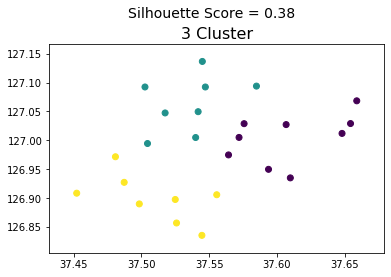

In [837]:
plt.scatter(station_info_df['Latitude'].values,  station_info_df['Longitude'], c = groups_3.labels_)
plt.title('3 Cluster', fontsize = 16)
plt.suptitle('Silhouette Score = 0.38', fontsize = 14)
plt.subplots_adjust(top=0.85)

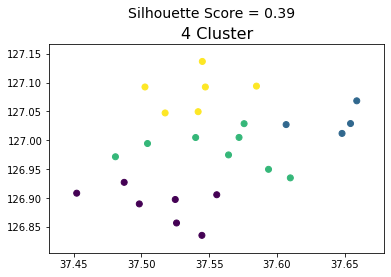

In [838]:
plt.scatter(station_info_df['Latitude'].values,  station_info_df['Longitude'], c = groups_4.labels_)
plt.title('4 Cluster', fontsize = 16)
plt.suptitle('Silhouette Score = 0.39', fontsize = 14)
plt.subplots_adjust(top=0.85)


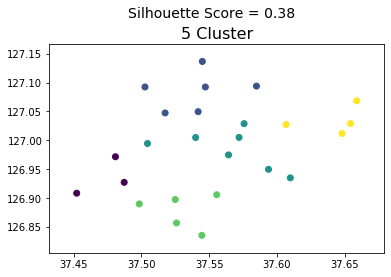

In [839]:
plt.scatter(station_info_df['Latitude'].values,  station_info_df['Longitude'], c = groups_5.labels_)
plt.title('5 Cluster', fontsize = 16)
plt.suptitle('Silhouette Score = 0.38', fontsize = 14)
plt.subplots_adjust(top=0.85)

In [840]:
print(np.where(np.array(groups_5.labels_)==0)) # west
print(np.where(np.array(groups_5.labels_)==1)) # north
print(np.where(np.array(groups_5.labels_)==2)) # middle
print(np.where(np.array(groups_5.labels_)==3)) # south
print(np.where(np.array(groups_5.labels_)==4)) # east
print(station_info_df.head())

(array([17, 19, 20], dtype=int64),)
(array([ 6,  7,  9, 22, 23, 24], dtype=int64),)
(array([ 0,  1,  2,  3,  4,  8, 21], dtype=int64),)
(array([ 5, 14, 15, 16, 18], dtype=int64),)
(array([10, 11, 12, 13], dtype=int64),)
   Station code Station name(district)  \
0           101              Jongno-gu   
1           102                Jung-gu   
2           103             Yongsan-gu   
3           104           Eunpyeong-gu   
4           105           Seodaemun-gu   

                                             Address   Latitude   Longitude  
0  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008  
1  15, Deoksugung-gil, Jung-gu, Seoul, Republic o...  37.564263  126.974676  
2  136, Hannam-daero, Yongsan-gu, Seoul, Republic...  37.540033  127.004850  
3  215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...  37.609823  126.934848  
4  32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...  37.593742  126.949679  


In [841]:
station_west = list(station_info_df.iloc[list(np.where(np.array(groups_5.labels_)==0)[0])]['Station code'].values)
station_south = list(station_info_df.iloc[list(np.where(np.array(groups_5.labels_)==3)[0])]['Station code'].values)
station_east = list(station_info_df.iloc[list(np.where(np.array(groups_5.labels_)==4)[0])]['Station code'].values)
station_north = list(station_info_df.iloc[list(np.where(np.array(groups_5.labels_)==1)[0])]['Station code'].values)
station_mid = list(station_info_df.iloc[list(np.where(np.array(groups_5.labels_)==2)[0])]['Station code'].values)
stations = dict()
stations['west'] = station_west
stations['south'] = station_south
stations['east'] = station_east
stations['north'] = station_north
stations['mid'] = station_mid
print(stations)

{'west': [118, 120, 121], 'south': [106, 115, 116, 117, 119], 'east': [111, 112, 113, 114], 'north': [107, 108, 110, 123, 124, 125], 'mid': [101, 102, 103, 104, 105, 109, 122]}


In [842]:
pollution_d2_df = pd.read_csv("C:/Users/hwang/3rd_grade_1/SMART_AI/term_project/AirPollutionSeoul/Original Data/Measurement_info.csv")
# item_grouped = pollution_d2_df.groupby('Item code').groups
date = pollution_d2_df['Measurement date'].values
years, months, days, times = [],[],[],[]
for i in range(len(pollution_d2_df)):
    year, month, day, time = int(date[i].split('-')[0]), int(date[i].split('-')[1]), int(date[i].split('-')[2].split()[0]), date[i].split('-')[2].split()[1]
    time = int(time.split(':')[0])
    years += [year]
    months += [month]
    days += [day]
    times += [time]
    
pollution_d2_df['year'] = years
pollution_d2_df['month'] = months
pollution_d2_df['day'] = days
pollution_d2_df['time'] = times

cols = ['year', 'month', 'day', 'time', 'Station code', 'Item code', 'Average value', 'Instrument status']
pollution_d2_df.drop(columns=['Measurement date'], inplace = True)
pollution_d2_df = pollution_d2_df[cols]

In [843]:
pollution_d2_df = pollution_d2_df.sort_values(by=['year', 'month', 'day', 'time', 'Station code', 'Item code'])

In [844]:
pollution_d1_df = pd.read_csv("C:/Users/hwang/3rd_grade_1/SMART_AI/term_project/AirPollutionSeoul.csv")
pollution_d1_df = pollution_d1_df.iloc[pollution_d1_df.groupby('year').groups[2020]]

In [845]:
pollution_df = pollution_d2_df.append(pollution_d1_df)

In [846]:
pollution_df.reset_index(drop=True, inplace=True)
pollution_df

,year,month,day,time,Station code,Item code,Average value,Instrument status
0,2017,1,1,0,101,1,0.004,0
1,2017,1,1,0,101,3,0.059,0
2,2017,1,1,0,101,5,1.200,0
3,2017,1,1,0,101,6,0.002,0
4,2017,1,1,0,101,8,73.000,0
...,...,...,...,...,...,...,...,...
4375261,2020,5,16,18,125,3,0.029,0
4375262,2020,5,16,18,125,5,0.500,0
4375263,2020,5,16,18,125,6,0.036,0
4375264,2020,5,16,18,125,8,38.000,0


In [847]:
item_info = item_info_df.set_index('Item code')
item_info.head()

,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
Item code,,,,,,
1,SO2,ppm,0.02,0.05,0.15,1.0
3,NO2,ppm,0.03,0.06,0.20,2.0
5,CO,ppm,2.00,9.00,15.00,50.0
6,O3,ppm,0.03,0.09,0.15,0.5
8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0


In [848]:
item_grouped = pollution_df.groupby('Item code').groups
item_grouped_dict = dict()
for key in item_grouped.keys():
    item_grouped_dict[item_info.loc[key]['Item name']] = pollution_df.iloc[item_grouped[key]].reset_index(drop=True)
item_grouped_dict['SO2'].head()

,year,month,day,time,Station code,Item code,Average value,Instrument status
0,2017,1,1,0,101,1,0.004,0
1,2017,1,1,0,102,1,0.006,0
2,2017,1,1,0,103,1,0.005,0
3,2017,1,1,0,104,1,0.005,0
4,2017,1,1,0,105,1,0.005,0


In [849]:
print(f"{len([i for i, x in enumerate(item_grouped_dict['SO2']['Average value'].values) if x<0])} negative values in SO2 data")
print(f"{len([i for i, x in enumerate(item_grouped_dict['NO2']['Average value'].values) if x<0])} negative values in NO2 data")
print(f"{len([i for i, x in enumerate(item_grouped_dict['CO']['Average value'].values) if x<0])} negative values in CO data")
print(f"{len([i for i, x in enumerate(item_grouped_dict['O3']['Average value'].values) if x<0])} negative values in O3 data")
print(f"{len([i for i, x in enumerate(item_grouped_dict['PM10']['Average value'].values) if x<0])} negative values in PM10 data")

4218 negative values in SO2 data
4115 negative values in NO2 data
4282 negative values in CO data
4326 negative values in O3 data
4284 negative values in PM10 data


Text(0, 0.5, 'SO2 Average value')

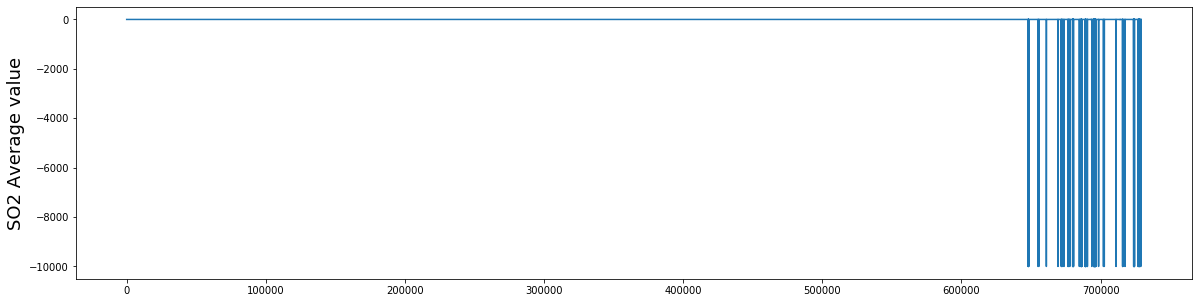

In [850]:
plt.figure(figsize = (20,5))
plt.plot(item_grouped_dict['SO2']['Average value'].values)
plt.ylabel('SO2 Average value', fontsize = 18)

C:\Users\hwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'SO2 average value')

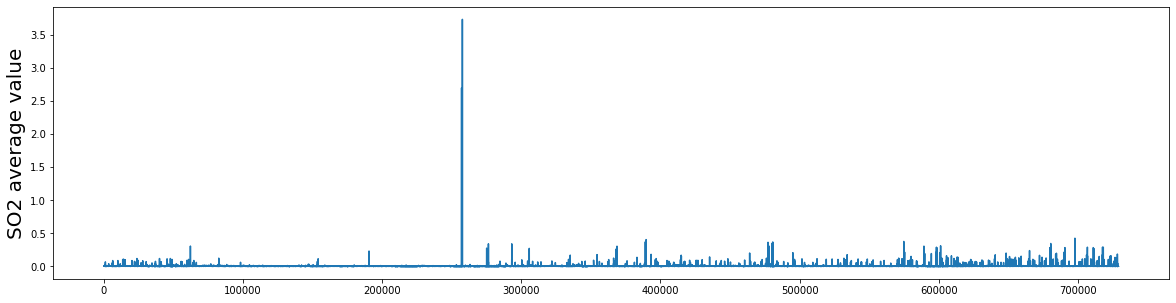

In [851]:
plt.figure(figsize = (20,5))
wrong_index = item_grouped_dict['SO2'].iloc[[i for i,x in enumerate(item_grouped_dict['SO2']['Average value'].values) if x<0]].index
for idx in wrong_index:
    item_grouped_dict['SO2']['Average value'][idx] = item_grouped_dict['SO2']['Average value'][idx-25]
plt.plot(item_grouped_dict['SO2']['Average value'].values)
plt.ylabel('SO2 average value', fontsize = 20)

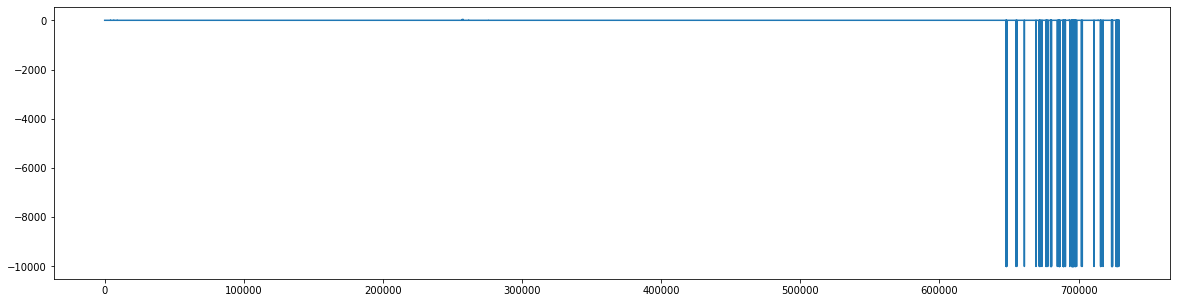

In [852]:
plt.figure(figsize = (20,5))
plt.plot(item_grouped_dict['NO2']['Average value'].values)

C:\Users\hwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


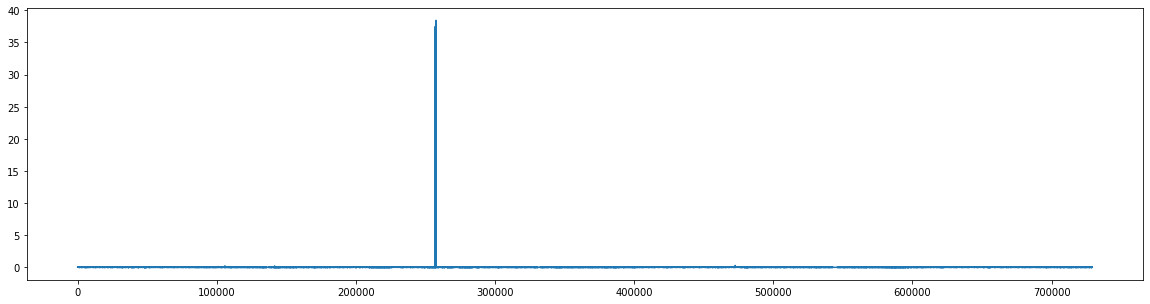

In [853]:
plt.figure(figsize = (20,5))
wrong_index = item_grouped_dict['NO2'].iloc[[i for i,x in enumerate(item_grouped_dict['NO2']['Average value'].values) if x<0]].index

for idx in wrong_index:
    item_grouped_dict['NO2']['Average value'][idx] = item_grouped_dict['NO2']['Average value'][idx-25]
plt.plot(item_grouped_dict['NO2']['Average value'].values)

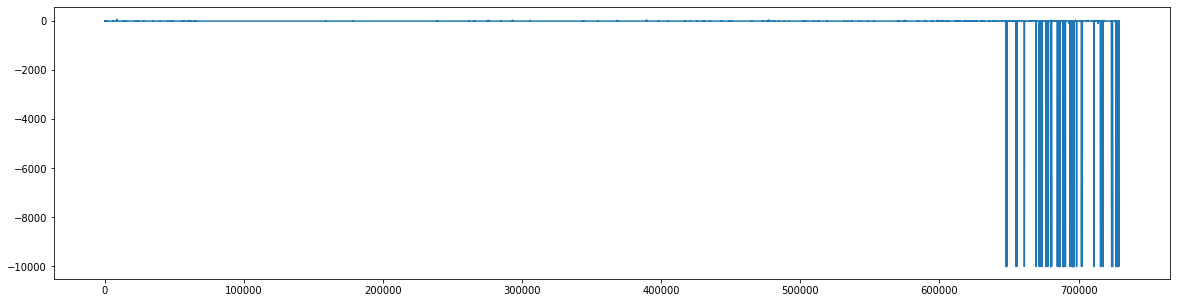

In [854]:
plt.figure(figsize = (20,5))
plt.plot(item_grouped_dict['CO']['Average value'].values)

C:\Users\hwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


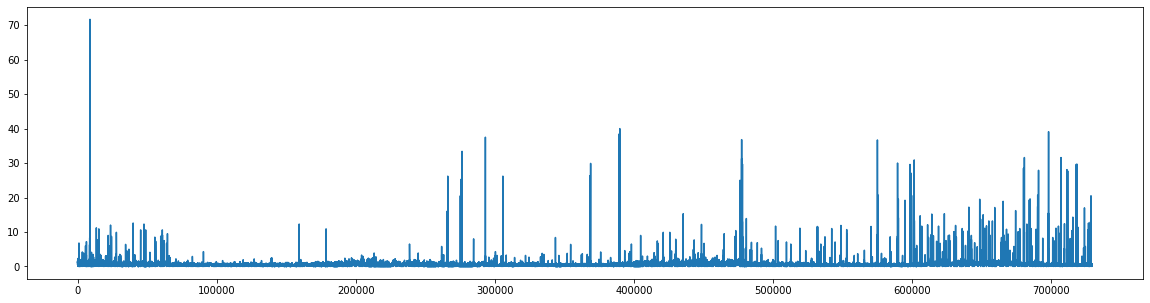

In [855]:
plt.figure(figsize = (20,5))
wrong_index = item_grouped_dict['CO'].iloc[[i for i,x in enumerate(item_grouped_dict['CO']['Average value'].values) if x<0]].index

for idx in wrong_index:
    item_grouped_dict['CO']['Average value'][idx] = item_grouped_dict['CO']['Average value'][idx-25]
plt.plot(item_grouped_dict['CO']['Average value'].values)

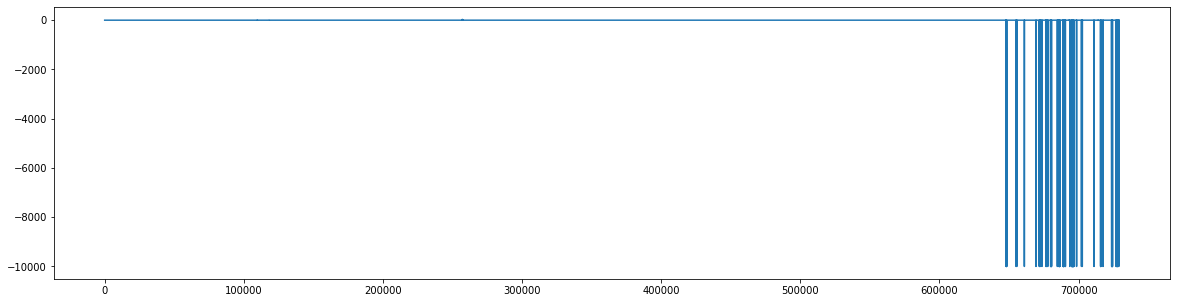

In [856]:
plt.figure(figsize = (20,5))
plt.plot(item_grouped_dict['O3']['Average value'].values)

C:\Users\hwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


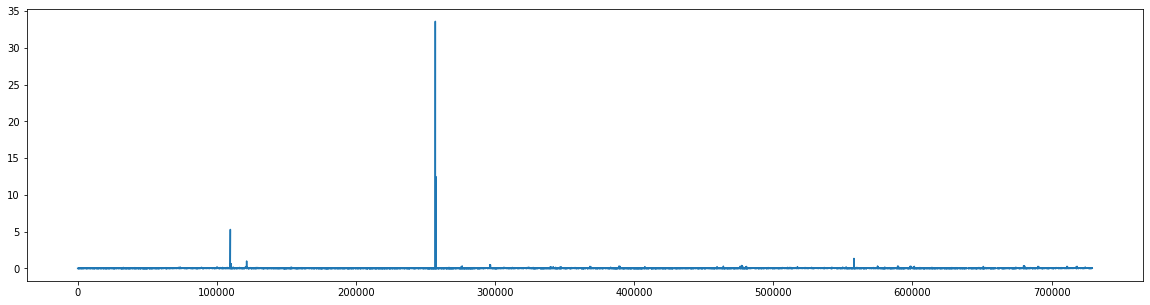

In [857]:
plt.figure(figsize = (20,5))
wrong_index = item_grouped_dict['O3'].iloc[[i for i,x in enumerate(item_grouped_dict['O3']['Average value'].values) if x<0]].index

for idx in wrong_index:
    item_grouped_dict['O3']['Average value'][idx] = item_grouped_dict['O3']['Average value'][idx-25]
plt.plot(item_grouped_dict['O3']['Average value'].values)

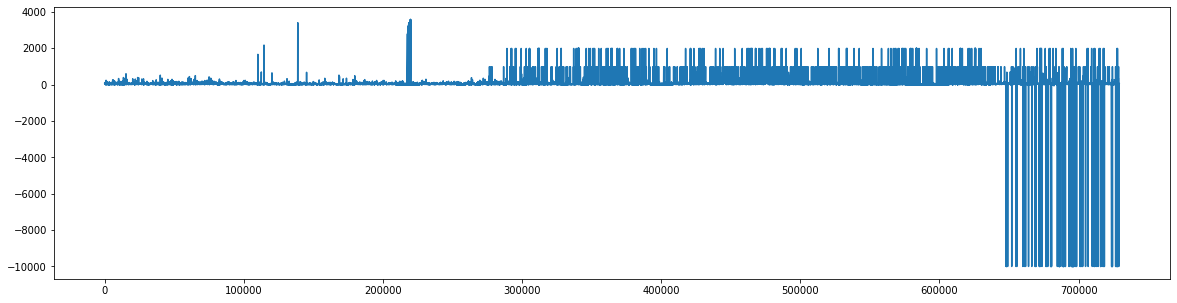

In [858]:
plt.figure(figsize = (20,5))
plt.plot(item_grouped_dict['PM10']['Average value'].values)

C:\Users\hwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


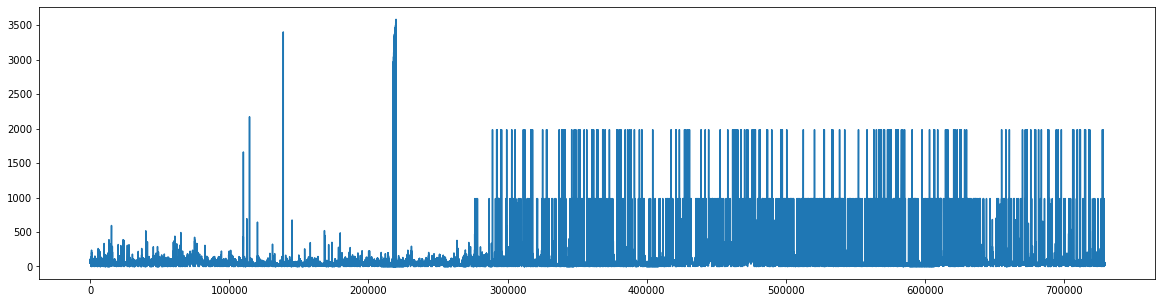

In [859]:
plt.figure(figsize = (20,5))
wrong_index = item_grouped_dict['PM10'].iloc[[i for i,x in enumerate(item_grouped_dict['PM10']['Average value'].values) if x<0]].index

for idx in wrong_index:
    item_grouped_dict['PM10']['Average value'][idx] = item_grouped_dict['PM10']['Average value'][idx-25]
plt.plot(item_grouped_dict['PM10']['Average value'].values)

In [863]:
SO2 = item_grouped_dict['SO2']
station_grouped_SO2 = SO2.groupby('Station code').groups
cluster_SO2 = dict()
average_by_cord = np.zeros(41)
for key in stations.keys():
    first = True
    count = 0
    by_coord = []
    for code in stations[key]:
        count += 1
        year_group = SO2.iloc[station_grouped_SO2[code]].groupby('year').groups
        month_group_2017 = SO2.iloc[year_group[2017]].groupby('month').groups
        month_group_2018 = SO2.iloc[year_group[2018]].groupby('month').groups
        month_group_2019 = SO2.iloc[year_group[2019]].groupby('month').groups
        month_group_2020 = SO2.iloc[year_group[2020]].groupby('month').groups
        for key2 in month_group_2017.keys():
            by_coord += [SO2.iloc[month_group_2017[key2]]['Average value'].values.mean()]
        for key2 in month_group_2018.keys():
            by_coord += [SO2.iloc[month_group_2018[key2]]['Average value'].values.mean()]
        for key2 in month_group_2019.keys():
            by_coord += [SO2.iloc[month_group_2019[key2]]['Average value'].values.mean()]
        for key2 in month_group_2020.keys():
            by_coord += [SO2.iloc[month_group_2020[key2]]['Average value'].values.mean()]
            
        average_by_coord = average_by_coord + np.array(by_coord)
        by_coord = []
        
    average_by_coord = average_by_coord/count
    cluster_SO2[key] = average_by_coord

cluster_SO2

{'west': array([0.00733616, 0.00723308, 0.00675822, 0.0064058 , 0.00663421,
        0.00564831, 0.0053311 , 0.00536874, 0.00565329, 0.00554073,
        0.006464  , 0.00692468, 0.00762643, 0.00758135, 0.00604165,
        0.00579052, 0.00476009, 0.00537286, 0.00528851, 0.00456371,
        0.00422025, 0.00479881, 0.00594805, 0.00639958, 0.00706329,
        0.0063545 , 0.00718901, 0.00512745, 0.00589068, 0.00483815,
        0.00477125, 0.00491918, 0.00442819, 0.00436622, 0.00506499,
        0.00486466, 0.00515814, 0.00461342, 0.00463008, 0.00421602,
        0.00362347]),
 'south': array([0.00690164, 0.00713263, 0.00749089, 0.00757505, 0.00776958,
        0.00625661, 0.0058966 , 0.00559982, 0.00610149, 0.0057232 ,
        0.00636002, 0.0063508 , 0.00713953, 0.00664306, 0.00800806,
        0.00559144, 0.00486734, 0.00539902, 0.00522733, 0.00413936,
        0.00383127, 0.00439928, 0.00523933, 0.00580303, 0.00634429,
        0.00656673, 0.0072483 , 0.00511089, 0.00585762, 0.00496068,
        0

<Figure size 1080x720 with 0 Axes>

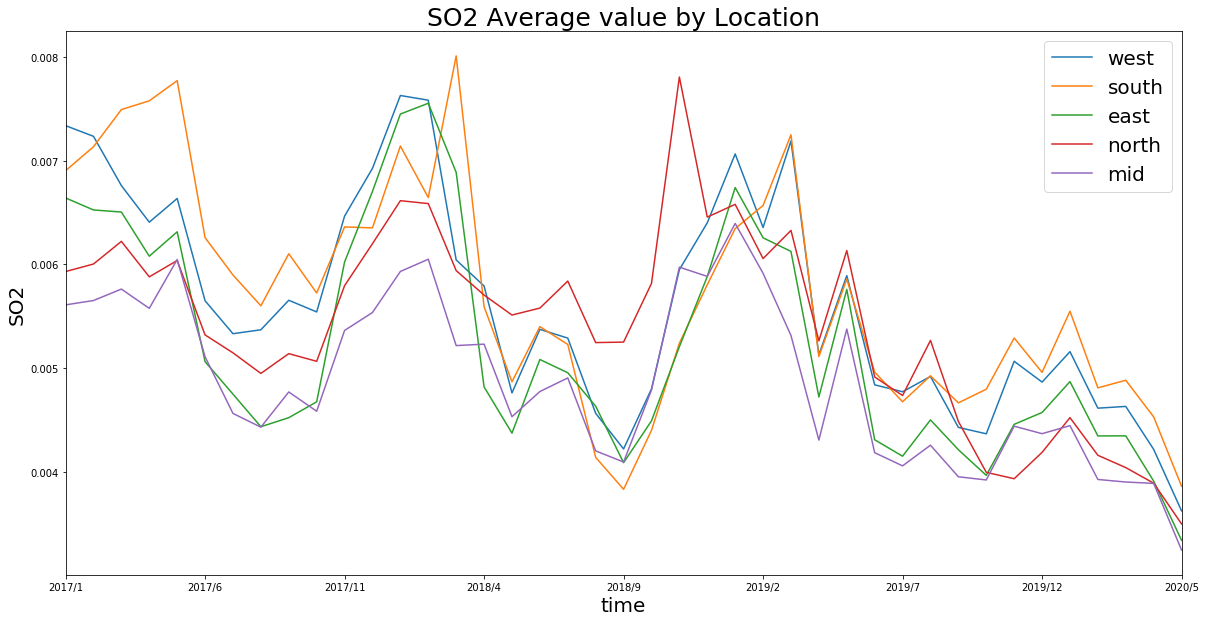

In [864]:
years = ['2017', '2018', '2019', '2020']
dates = []
for year in years:
    for i in range(1,13):
        if year == '2020' and i == 6:
            break
        dates += [year + '/' + str(i)]

cluster_SO2_df = pd.DataFrame(cluster_SO2)
cluster_SO2_df['date'] = dates
plt.figure(figsize = (15,10))
cluster_SO2_df.plot(x = 'date', y = ['west', 'south', 'east', 'north', 'mid'], figsize = (20,10))
plt.xlabel('time', fontsize = 20)
plt.ylabel('SO2', fontsize = 20)
plt.title("SO2 Average value by Location", fontsize = 25)
plt.legend(fontsize = 20)

In [865]:
place_1st = []
place_2nd = []
max_place_df = pd.DataFrame()
max_place_df['date'] = dates
place_points_dict = dict({'west': [0,0], 'east': [0,0], 'south':[0,0], 'north': [0,0], 'mid': [0,0]})
for i in range(len(cluster_SO2_df)):
    place_sorted = cluster_SO2_df.loc[i].drop('date').sort_values(ascending=False)
    place_1st += [place_sorted.index[0]]
    place_2nd += [place_sorted.index[1]]
    place_points_dict[place_sorted.index[0]][0] += 4
    place_points_dict[place_sorted.index[1]][0] += 3
    place_points_dict[place_sorted.index[2]][0] += 2
    place_points_dict[place_sorted.index[3]][0] += 1
    place_points_dict[place_sorted.index[0]][1] += place_sorted[0]
    place_points_dict[place_sorted.index[1]][1] += place_sorted[1]
    place_points_dict[place_sorted.index[2]][1] += place_sorted[2]
    place_points_dict[place_sorted.index[3]][1] += place_sorted[3]
    place_points_dict[place_sorted.index[4]][1] += place_sorted[4]

print("SO2")
max_place_df['max'] = place_1st
max_place_df['2nd_max'] = place_2nd
print(max_place_df.set_index('date'))
print("SO2")
print(place_points_dict)

SO2
           max 2nd_max
date                  
2017/1    west   south
2017/2    west   south
2017/3   south    west
2017/4   south    west
2017/5   south    west
2017/6   south    west
2017/7   south    west
2017/8   south    west
2017/9   south    west
2017/10  south    west
2017/11   west   south
2017/12   west    east
2018/1    west    east
2018/2    west    east
2018/3   south    east
2018/4    west   north
2018/5   north   south
2018/6   north   south
2018/7   north    west
2018/8   north    east
2018/9   north    west
2018/10  north    west
2018/11  north     mid
2018/12  north    west
2019/1    west    east
2019/2   south    west
2019/3   south    west
2019/4   north    west
2019/5   north    west
2019/6   south   north
2019/7    west   north
2019/8   north   south
2019/9   south   north
2019/10  south    west
2019/11  south    west
2019/12  south    west
2020/1   south    west
2020/2   south    west
2020/3   south    west
2020/4   south    west
2020/5   south    west
SO2
{'w

In [818]:
NO2 = item_grouped_dict['NO2']
station_grouped_NO2 = NO2.groupby('Station code').groups
cluster_NO2 = dict()
average_by_cord = np.zeros(41)
for key in stations.keys():
    first = True
    count = 0
    by_coord = []
    for code in stations[key]:
        count += 1
        year_group = NO2.iloc[station_grouped_NO2[code]].groupby('year').groups
        month_group_2017 = NO2.iloc[year_group[2017]].groupby('month').groups
        month_group_2018 = NO2.iloc[year_group[2018]].groupby('month').groups
        month_group_2019 = NO2.iloc[year_group[2019]].groupby('month').gDDDDDDroups
        month_group_2020 = NO2.iloc[year_group[2020]].groupby('month').groups
        for key2 in month_group_2017.keys():
            by_coord += [NO2.iloc[month_group_2017[key2]]['Average value'].values.mean()]
        for key2 in month_group_2018.keys():
            by_coord += [NO2.iloc[month_group_2018[key2]]['Average value'].values.mean()]
        for key2 in month_group_2019.keys():
            by_coord += [NO2.iloc[month_group_2019[key2]]['Average value'].values.mean()]
        for key2 in month_group_2020.keys():
            by_coord += [NO2.iloc[month_group_2020[key2]]['Average value'].values.mean()]
            
        average_by_coord = average_by_coord + np.array(by_coord)
        by_coord = []
        
    average_by_coord = average_by_coord/count
    cluster_NO2[key] = average_by_coord

cluster_NO2

{'west': array([0.05194398, 0.04919978, 0.05392342, 0.04281116, 0.03967222,
        0.03263715, 0.02723831, 0.02713613, 0.03494452, 0.03401374,
        0.04299498, 0.04208612, 0.04775944, 0.0471046 , 0.04370176,
        0.04163129, 0.03404896, 0.03353334, 0.0271115 , 0.02386648,
        0.02528205, 0.03648828, 0.05350659, 0.04962531, 0.05663292,
        0.05165757, 0.04949697, 0.03912218, 0.03819552, 0.02787092,
        0.02345657, 0.02448728, 0.03157889, 0.02931725, 0.04483479,
        0.04626545, 0.04671042, 0.04300897, 0.03821436, 0.03075405,
        0.02707798]),
 'south': array([0.04284955, 0.0419965 , 0.04815323, 0.03907445, 0.03462073,
        0.02973715, 0.02766997, 0.0272283 , 0.03399668, 0.03377829,
        0.0403615 , 0.03879921, 0.04277474, 0.0399239 , 0.07783928,
        0.03972765, 0.03282001, 0.03182583, 0.024668  , 0.02135797,
        0.02490224, 0.03775545, 0.05062604, 0.04302157, 0.04815754,
        0.04880651, 0.04446213, 0.03781247, 0.03351457, 0.02607224,
        0

<Figure size 1440x720 with 0 Axes>

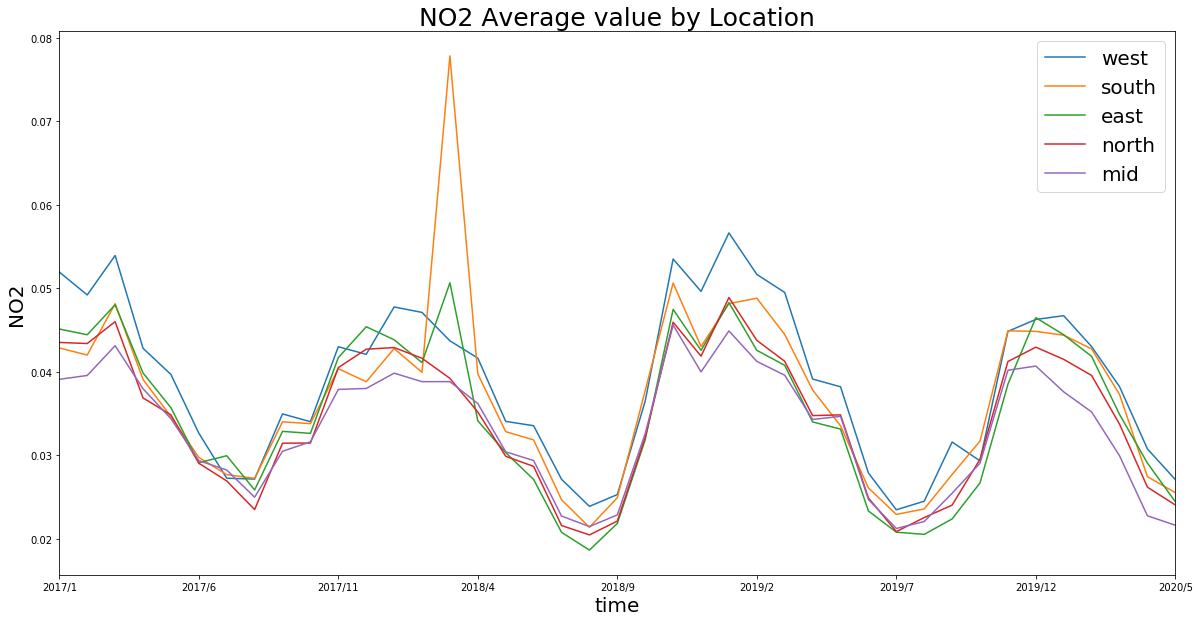

In [819]:
cluster_NO2_df = pd.DataFrame(cluster_NO2)
cluster_NO2_df['date'] = dates
plt.figure(figsize = (20,10))
cluster_NO2_df.plot(x = 'date', y = ['west', 'south', 'east', 'north', 'mid'], figsize = (20,10))
plt.xlabel('time')
plt.ylabel('NO2')
plt.xlabel('time', fontsize = 20)
plt.ylabel('NO2', fontsize = 20)
plt.title("NO2 Average value by Location", fontsize = 25)
plt.legend(fontsize = 20)

In [820]:
place_1st = []
place_2nd = []
max_place_df = pd.DataFrame()
max_place_df['date'] = dates
place_points_dict = dict({'west': [0,0], 'east': [0,0], 'south':[0,0], 'north': [0,0], 'mid': [0,0]})
for i in range(len(cluster_NO2_df)):
    place_sorted = cluster_NO2_df.loc[i].drop('date').sort_values(ascending=False)
    place_1st += [place_sorted.index[0]]
    place_2nd += [place_sorted.index[1]]
    place_points_dict[place_sorted.index[0]][0] += 4
    place_points_dict[place_sorted.index[1]][0] += 3
    place_points_dict[place_sorted.index[2]][0] += 2
    place_points_dict[place_sorted.index[3]][0] += 1
    place_points_dict[place_sorted.index[0]][1] += place_sorted[0]
    place_points_dict[place_sorted.index[1]][1] += place_sorted[1]
    place_points_dict[place_sorted.index[2]][1] += place_sorted[2]
    place_points_dict[place_sorted.index[3]][1] += place_sorted[3]
    place_points_dict[place_sorted.index[4]][1] += place_sorted[4]
    
print("NO2")
max_place_df['max'] = place_1st
max_place_df['2nd_max'] = place_2nd
print(max_place_df.set_index('date'))
print("NO2")
print(place_points_dict)    

NO2
           max 2nd_max
date                  
2017/1    west    east
2017/2    west    east
2017/3    west   south
2017/4    west    east
2017/5    west    east
2017/6    west   south
2017/7    east     mid
2017/8   south    west
2017/9    west   south
2017/10   west   south
2017/11   west    east
2017/12   east   north
2018/1    west    east
2018/2    west   north
2018/3   south    east
2018/4    west   south
2018/5    west   south
2018/6    west   south
2018/7    west   south
2018/8    west     mid
2018/9    west   south
2018/10  south    west
2018/11   west   south
2018/12   west   south
2019/1    west   north
2019/2    west   south
2019/3    west   south
2019/4    west   south
2019/5    west   north
2019/6    west   south
2019/7    west   south
2019/8    west   south
2019/9    west   south
2019/10  south   north
2019/11  south    west
2019/12   east    west
2020/1    west    east
2020/2    west   south
2020/3    west   south
2020/4    west    east
2020/5    west   south
NO2
{'w

In [822]:
CO = item_grouped_dict['CO']
station_grouped_CO = CO.groupby('Station code').groups
cluster_CO = dict()
average_by_cord = np.zeros(41)
for key in stations.keys():
    first = True
    count = 0
    by_coord = []
    for code in stations[key]:
        count += 1
        year_group = CO.iloc[station_grouped_CO[code]].groupby('year').groups
        month_group_2017 = CO.iloc[year_group[2017]].groupby('month').groups
        month_group_2018 = CO.iloc[year_group[2018]].groupby('month').groups
        month_group_2019 = CO.iloc[year_group[2019]].groupby('month').groups
        month_group_2020 = CO.iloc[year_group[2020]].groupby('month').groups
        for key2 in month_group_2017.keys():
            by_coord += [CO.iloc[month_group_2017[key2]]['Average value'].values.mean()]
        for key2 in month_group_2018.keys():
            by_coord += [CO.iloc[month_group_2018[key2]]['Average value'].values.mean()]
        for key2 in month_group_2019.keys():
            by_coord += [CO.iloc[month_group_2019[key2]]['Average value'].values.mean()]
        for key2 in month_group_2020.keys():
            by_coord += [CO.iloc[month_group_2020[key2]]['Average value'].values.mean()]
            
        average_by_coord = average_by_coord + np.array(by_coord)
        by_coord = []
        
    average_by_coord = average_by_coord/count
    cluster_CO[key] = average_by_coord

cluster_CO

{'west': array([0.71262646, 0.65162603, 0.63525071, 0.50862627, 0.41347277,
        0.3884394 , 0.36644186, 0.3503477 , 0.45261051, 0.4352184 ,
        0.53804289, 0.59026275, 0.61739839, 0.56368056, 0.53583252,
        0.46701582, 0.40417551, 0.37483192, 0.31048163, 0.32050008,
        0.34377313, 0.44867725, 0.64774495, 0.61193847, 0.69988827,
        0.63209955, 0.65704536, 0.41522695, 0.437951  , 0.34059382,
        0.31786171, 0.3609149 , 0.3964148 , 0.44135644, 0.59255874,
        0.61906943, 0.68546704, 0.60639196, 0.51571252, 0.42072799,
        0.41626085]),
 'south': array([0.85752529, 0.79252759, 0.76492649, 0.63994748, 0.54645799,
        0.50524344, 0.50113783, 0.48428997, 0.58421655, 0.58432863,
        0.74710858, 0.7406332 , 0.77571086, 0.69904563, 0.61332242,
        0.54215316, 0.50419532, 0.4708275 , 0.3736017 , 0.38135808,
        0.41586574, 0.54129459, 0.76743788, 0.74069415, 0.80762234,
        0.75912824, 0.81771743, 0.49720394, 0.51261172, 0.41311876,
        0

<Figure size 1440x720 with 0 Axes>

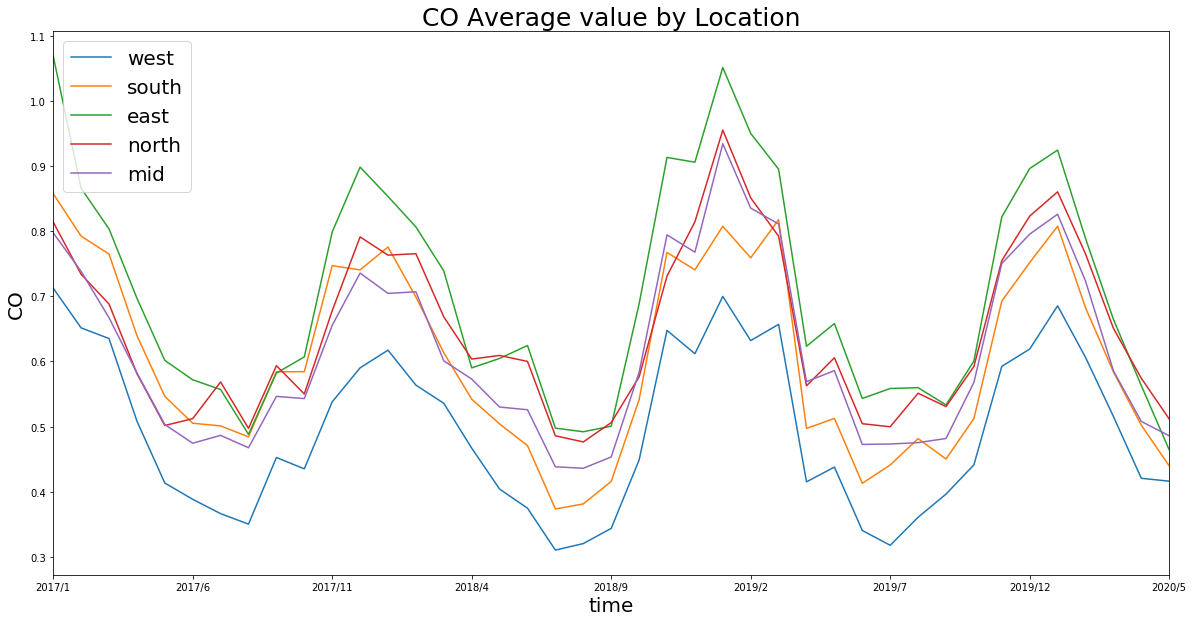

In [823]:
cluster_CO_df = pd.DataFrame(cluster_CO)
cluster_CO_df['date'] = dates
plt.figure(figsize = (20,10))
cluster_CO_df.plot(x = 'date', y = ['west', 'south', 'east', 'north', 'mid'], figsize = (20,10))
plt.xlabel('time', fontsize = 20)
plt.ylabel('CO', fontsize = 20)
plt.title("CO Average value by Location", fontsize = 25)
plt.legend(fontsize = 20)

In [824]:
place_1st = []
place_2nd = []
max_place_df = pd.DataFrame()
max_place_df['date'] = dates
place_points_dict = dict({'west': [0,0], 'east': [0,0], 'south':[0,0], 'north': [0,0], 'mid': [0,0]})
for i in range(len(cluster_CO_df)):
    place_sorted = cluster_CO_df.loc[i].drop('date').sort_values(ascending=False)
    place_1st += [place_sorted.index[0]]
    place_2nd += [place_sorted.index[1]]
    place_points_dict[place_sorted.index[0]][0] += 4
    place_points_dict[place_sorted.index[1]][0] += 3
    place_points_dict[place_sorted.index[2]][0] += 2
    place_points_dict[place_sorted.index[3]][0] += 1
    place_points_dict[place_sorted.index[0]][1] += place_sorted[0]
    place_points_dict[place_sorted.index[1]][1] += place_sorted[1]
    place_points_dict[place_sorted.index[2]][1] += place_sorted[2]
    place_points_dict[place_sorted.index[3]][1] += place_sorted[3]
    place_points_dict[place_sorted.index[4]][1] += place_sorted[4]
   
print("CO")
max_place_df['max'] = place_1st
max_place_df['2nd_max'] = place_2nd
print(max_place_df.set_index('date'))
print("CO")
print(place_points_dict)

CO
           max 2nd_max
date                  
2017/1    east   south
2017/2    east   south
2017/3    east   south
2017/4    east   south
2017/5    east   south
2017/6    east   north
2017/7   north    east
2017/8   north    east
2017/9   north   south
2017/10   east   south
2017/11   east   south
2017/12   east   north
2018/1    east   south
2018/2    east   north
2018/3    east   north
2018/4   north    east
2018/5   north    east
2018/6    east   north
2018/7    east   north
2018/8    east   north
2018/9   north    east
2018/10   east     mid
2018/11   east     mid
2018/12   east   north
2019/1    east   north
2019/2    east   north
2019/3    east   south
2019/4    east     mid
2019/5    east   north
2019/6    east   north
2019/7    east   north
2019/8    east   north
2019/9    east   north
2019/10   east   north
2019/11   east   north
2019/12   east   north
2020/1    east   north
2020/2    east   north
2020/3    east   north
2020/4   north    east
2020/5   north     mid
CO
{'wes

In [825]:
O3 = item_grouped_dict['O3']
station_grouped_O3 = O3.groupby('Station code').groups
cluster_O3 = dict()
average_by_cord = np.zeros(41)
for key in stations.keys():
    first = True
    count = 0
    by_coord = []
    for code in stations[key]:
        count += 1
        year_group = O3.iloc[station_grouped_O3[code]].groupby('year').groups
        month_group_2017 = O3.iloc[year_group[2017]].groupby('month').groups
        month_group_2018 = O3.iloc[year_group[2018]].groupby('month').groups
        month_group_2019 = O3.iloc[year_group[2019]].groupby('month').groups
        month_group_2020 = O3.iloc[year_group[2020]].groupby('month').groups
        for key2 in month_group_2017.keys():
            by_coord += [O3.iloc[month_group_2017[key2]]['Average value'].values.mean()]
        for key2 in month_group_2018.keys():
            by_coord += [O3.iloc[month_group_2018[key2]]['Average value'].values.mean()]
        for key2 in month_group_2019.keys():
            by_coord += [O3.iloc[month_group_2019[key2]]['Average value'].values.mean()]
        for key2 in month_group_2020.keys():
            by_coord += [O3.iloc[month_group_2020[key2]]['Average value'].values.mean()]
            
        average_by_coord = average_by_coord + np.array(by_coord)
        by_coord = []
        
    average_by_coord = average_by_coord/count
    cluster_O3[key] = average_by_coord

cluster_O3

{'west': array([0.27979918, 0.26500822, 0.24852348, 0.23295031, 0.21154237,
        0.20027224, 0.1920873 , 0.18057798, 0.20909899, 0.19990914,
        0.23248838, 0.25577343, 0.24797891, 0.25334029, 0.22532855,
        0.22279092, 0.21096396, 0.21108251, 0.1714368 , 0.17645711,
        0.17897284, 0.21232568, 0.27551991, 0.26790394, 0.3235018 ,
        0.29568602, 0.30267973, 0.21979361, 0.23710317, 0.19465105,
        0.18980571, 0.18773482, 0.1779818 , 0.20611411, 0.26144225,
        0.27542071, 0.28756828, 0.25694434, 0.21885827, 0.20129284,
        0.19092101]),
 'south': array([0.06858457, 0.06895938, 0.07113722, 0.0803234 , 0.08158213,
        0.08132223, 0.07116585, 0.06226237, 0.07089452, 0.06000844,
        0.05927712, 0.05993426, 0.06158987, 0.066888  , 0.08911652,
        0.0752143 , 0.08105328, 0.07875956, 0.05791397, 0.06663363,
        0.06467651, 0.06106944, 0.06628287, 0.06475337, 0.07625137,
        0.07726935, 0.09071409, 0.0710291 , 0.08848548, 0.0782316 ,
        0

<Figure size 1440x720 with 0 Axes>

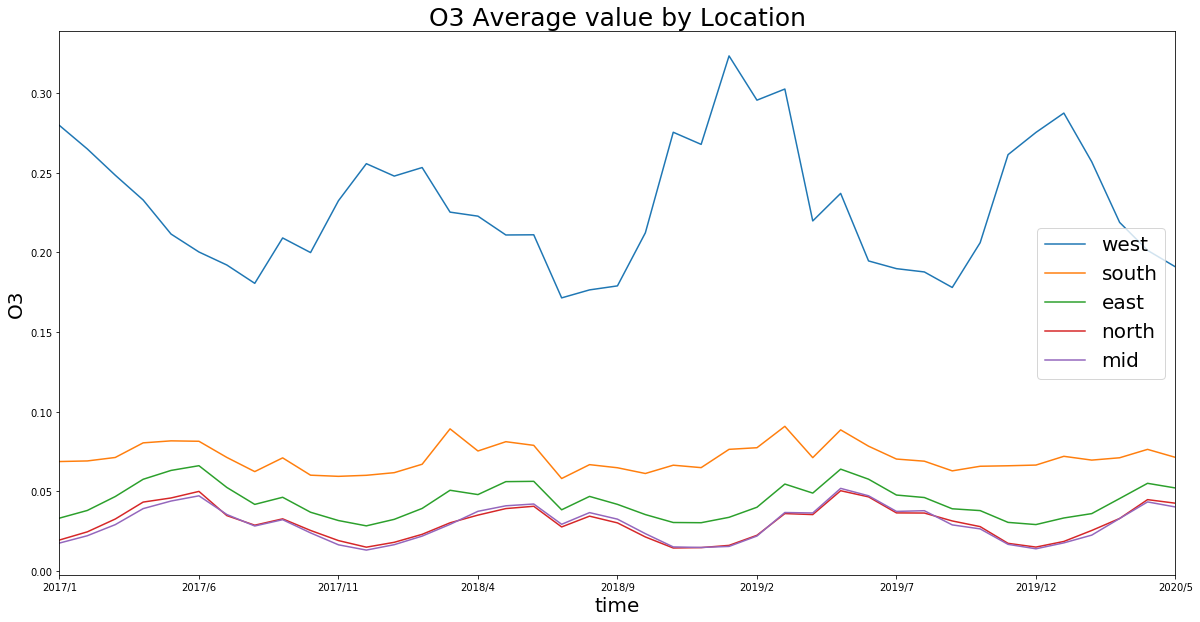

In [826]:
cluster_O3_df = pd.DataFrame(cluster_O3)
cluster_O3_df['date'] = dates
plt.figure(figsize = (20,10))
cluster_O3_df.plot(x = 'date', y = ['west', 'south', 'east', 'north', 'mid'], figsize = (20,10))
plt.xlabel('time', fontsize = 20)
plt.ylabel('O3', fontsize = 20)
plt.title("O3 Average value by Location", fontsize = 25)
plt.legend(fontsize = 20)

In [827]:
place_1st = []
place_2nd = []
max_place_df = pd.DataFrame()
max_place_df['date'] = dates
place_points_dict = dict({'west': [0,0], 'east': [0,0], 'south':[0,0], 'north': [0,0], 'mid': [0,0]})
for i in range(len(cluster_O3_df)):
    place_sorted = cluster_O3_df.loc[i].drop('date').sort_values(ascending=False)
    place_1st += [place_sorted.index[0]]
    place_2nd += [place_sorted.index[1]]
    place_points_dict[place_sorted.index[0]][0] += 4
    place_points_dict[place_sorted.index[1]][0] += 3
    place_points_dict[place_sorted.index[2]][0] += 2
    place_points_dict[place_sorted.index[3]][0] += 1
    place_points_dict[place_sorted.index[0]][1] += place_sorted[0]
    place_points_dict[place_sorted.index[1]][1] += place_sorted[1]
    place_points_dict[place_sorted.index[2]][1] += place_sorted[2]
    place_points_dict[place_sorted.index[3]][1] += place_sorted[3]
    place_points_dict[place_sorted.index[4]][1] += place_sorted[4]
    
print("O3")
max_place_df['max'] = place_1st
max_place_df['2nd_max'] = place_2nd
print(max_place_df.set_index('date'))
print("O3")
print(place_points_dict)

O3
          max 2nd_max
date                 
2017/1   west   south
2017/2   west   south
2017/3   west   south
2017/4   west   south
2017/5   west   south
2017/6   west   south
2017/7   west   south
2017/8   west   south
2017/9   west   south
2017/10  west   south
2017/11  west   south
2017/12  west   south
2018/1   west   south
2018/2   west   south
2018/3   west   south
2018/4   west   south
2018/5   west   south
2018/6   west   south
2018/7   west   south
2018/8   west   south
2018/9   west   south
2018/10  west   south
2018/11  west   south
2018/12  west   south
2019/1   west   south
2019/2   west   south
2019/3   west   south
2019/4   west   south
2019/5   west   south
2019/6   west   south
2019/7   west   south
2019/8   west   south
2019/9   west   south
2019/10  west   south
2019/11  west   south
2019/12  west   south
2020/1   west   south
2020/2   west   south
2020/3   west   south
2020/4   west   south
2020/5   west   south
O3
{'west': [164, 9.389631962010975], 'east': [82, 

In [828]:
PM10 = item_grouped_dict['PM10']
station_grouped_PM10 = PM10.groupby('Station code').groups
cluster_PM10 = dict()
average_by_cord = np.zeros(41)
for key in stations.keys():
    first = True
    count = 0
    by_coord = []
    for code in stations[key]:
        count += 1
        year_group = PM10.iloc[station_grouped_PM10[code]].groupby('year').groups
        month_group_2017 = PM10.iloc[year_group[2017]].groupby('month').groups
        month_group_2018 = PM10.iloc[year_group[2018]].groupby('month').groups
        month_group_2019 = PM10.iloc[year_group[2019]].groupby('month').groups
        month_group_2020 = PM10.iloc[year_group[2020]].groupby('month').groups
        for key2 in month_group_2017.keys():
            by_coord += [PM10.iloc[month_group_2017[key2]]['Average value'].values.mean()]
        for key2 in month_group_2018.keys():
            by_coord += [PM10.iloc[month_group_2018[key2]]['Average value'].values.mean()]
        for key2 in month_group_2019.keys():
            by_coord += [PM10.iloc[month_group_2019[key2]]['Average value'].values.mean()]
        for key2 in month_group_2020.keys():
            by_coord += [PM10.iloc[month_group_2020[key2]]['Average value'].values.mean()]
            
        average_by_coord = average_by_coord + np.array(by_coord)
        by_coord = []
        
    average_by_coord = average_by_coord/count
    cluster_PM10[key] = average_by_coord

cluster_PM10

{'west': array([48.55103236, 41.98450286, 54.61268721, 52.45234975, 59.90168403,
        42.45688325, 36.09778722, 22.3991435 , 31.08753148, 28.27807575,
        40.66421366, 47.3268918 , 49.87237965, 50.04097258, 52.65351866,
        50.45039803, 45.26179878, 40.66905751, 29.61724416, 26.1246183 ,
        25.63162711, 31.34422636, 56.64015975, 46.60432454, 68.34693731,
        62.57025489, 81.30569573, 46.17156454, 53.61839011, 31.66105872,
        27.30102753, 28.04277226, 18.63535659, 24.76233708, 41.2680143 ,
        42.04328981, 44.76836884, 43.18855325, 46.83888555, 43.7301432 ,
        37.65977879]),
 'south': array([ 62.18977637,  55.1957101 ,  73.81151594,  67.69130328,
         75.61743358,  50.57248776,  41.62278325,  27.33789322,
         42.12139518,  37.35453988,  50.40617607, 101.56967943,
         94.7849598 ,  64.84569452,  63.28742416,  64.22257961,
         56.45477911,  52.07686706,  33.1667284 ,  34.03836452,
         31.87799209,  43.03739366,  70.41719862,  61.18

<Figure size 1440x720 with 0 Axes>

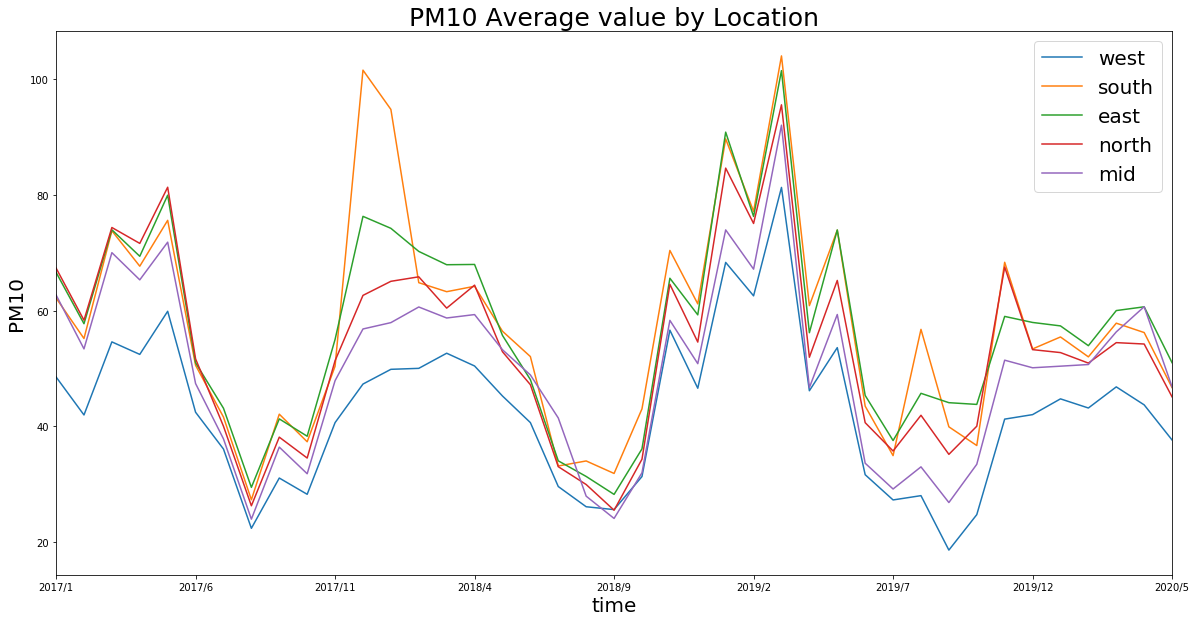

In [829]:
cluster_PM10_df = pd.DataFrame(cluster_PM10)
cluster_PM10_df['date'] = dates
plt.figure(figsize = (20,10))
cluster_PM10_df.plot(x = 'date', y = ['west', 'south', 'east', 'north', 'mid'], figsize = (20,10))
plt.xlabel('time', fontsize = 20)
plt.ylabel('PM10', fontsize = 20)
plt.title("PM10 Average value by Location", fontsize = 25)
plt.legend(fontsize = 20)

In [830]:
place_1st = []
place_2nd = []
max_place_df = pd.DataFrame()
max_place_df['date'] = dates
place_points_dict = dict({'west': [0,0], 'east': [0,0], 'south':[0,0], 'north': [0,0], 'mid': [0,0]})
for i in range(len(cluster_PM10_df)):
    place_sorted = cluster_PM10_df.loc[i].drop('date').sort_values(ascending=False)
    place_1st += [place_sorted.index[0]]
    place_2nd += [place_sorted.index[1]]
    place_points_dict[place_sorted.index[0]][0] += 4
    place_points_dict[place_sorted.index[1]][0] += 3
    place_points_dict[place_sorted.index[2]][0] += 2
    place_points_dict[place_sorted.index[3]][0] += 1
    place_points_dict[place_sorted.index[0]][1] += place_sorted[0]
    place_points_dict[place_sorted.index[1]][1] += place_sorted[1]
    place_points_dict[place_sorted.index[2]][1] += place_sorted[2]
    place_points_dict[place_sorted.index[3]][1] += place_sorted[3]
    place_points_dict[place_sorted.index[4]][1] += place_sorted[4]
    
print("PM10")
max_place_df['max'] = place_1st
max_place_df['2nd_max'] = place_2nd
print(max_place_df.set_index("date"))
print("PM10")
print(place_points_dict)

PM10
           max 2nd_max
date                  
2017/1   north    east
2017/2   north    east
2017/3   north    east
2017/4   north    east
2017/5   north    east
2017/6   north    east
2017/7    east   south
2017/8    east   south
2017/9   south    east
2017/10   east   south
2017/11   east   north
2017/12  south    east
2018/1   south    east
2018/2    east   north
2018/3    east   south
2018/4    east   north
2018/5   south    east
2018/6   south     mid
2018/7     mid    east
2018/8   south    east
2018/9   south    east
2018/10  south    east
2018/11  south    east
2018/12  south    east
2019/1    east   south
2019/2   south    east
2019/3   south    east
2019/4   south    east
2019/5    east   south
2019/6    east   south
2019/7    east   north
2019/8   south    east
2019/9    east   south
2019/10   east   north
2019/11  south   north
2019/12   east   south
2020/1    east   south
2020/2    east   south
2020/3    east   south
2020/4     mid    east
2020/5    east     mid
PM10
{

In [743]:
SO2_time_grouped = SO2.groupby(['year', 'month']).groups

In [744]:
time = []
time_2020 = []
avg_contam = []
avg_contam_2020 = []
for key in SO2_time_grouped.keys():
    if key[0] == 2020:
        time_2020 += [key]
        avg_contam_2020 += [SO2.iloc[SO2_time_grouped[key]]['Average value'].values.mean()]
        continue
    time += [key]
    avg_contam += [SO2.iloc[SO2_time_grouped[key]]['Average value'].values.mean()]
    
len(avg_contam)

36

In [745]:
SO2_avg_df = pd.DataFrame()
SO2_avg_df['time'] = time
SO2_avg_df['average_SO2'] = avg_contam
SO2_avg_df

,time,average_SO2
0,"(2017, 1)",0.005020
1,"(2017, 2)",0.005059
2,"(2017, 3)",0.005146
3,"(2017, 4)",0.004967
4,"(2017, 5)",0.005189
5,"(2017, 6)",0.004350
6,"(2017, 7)",0.004064
7,"(2017, 8)",0.003910
8,"(2017, 9)",0.004143
9,"(2017, 10)",0.004033


In [746]:
y_2017 = 0
y_2018 = 0
y_2019 = 0
for i in range(len(SO2_avg_df)):
    if SO2_avg_df['time'][i][0] == 2017:
        y_2017 += 1
    if SO2_avg_df['time'][i][0] == 2018:
        y_2018 += 1
    if SO2_avg_df['time'][i][0] == 2019:
        y_2019 += 1
print(y_2017)
print(y_2018)
print(y_2019)

12
12
12


C:\Users\hwang\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, 'SO2 value prediction 2019, blue = Prediction')

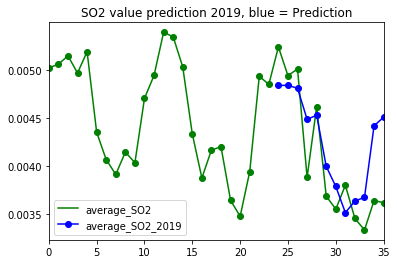

In [720]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import linregress
SO2ES = ExponentialSmoothing(SO2_avg_df[:24]['average_SO2'].values, trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()
forecast_pd = pd.DataFrame(SO2ES.forecast(12), index = range(24,36), columns = ['average_SO2_2019'])

ax = SO2_avg_df.plot(marker = 'o', color = 'green')
forecast_pd.plot(ax = ax, marker = 'o', color = 'blue')
plt.title('SO2 value prediction 2019, blue = Prediction', fontsize = 12)

Text(0, 0.5, 'SO2 Average Value')

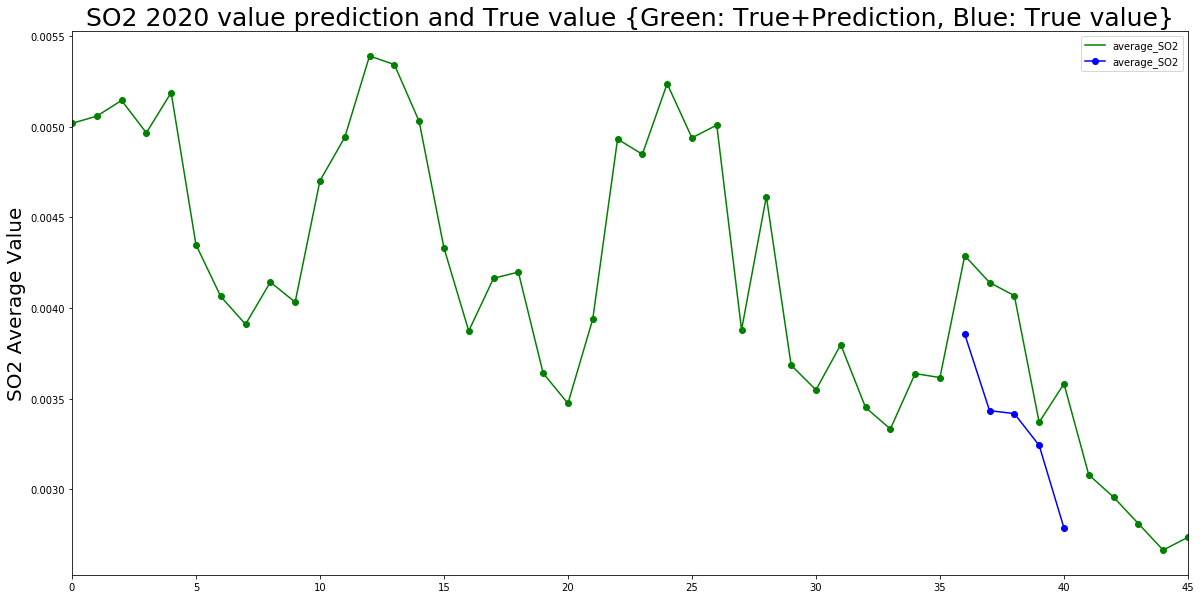

In [722]:
SO2_avg_df_2020 = pd.DataFrame()
SO2_avg_df_2020['time'] = time_2020
SO2_avg_df_2020['average_SO2'] = avg_contam_2020
SO2_avg_df_2020

SO2ES = ExponentialSmoothing(SO2_avg_df['average_SO2'].values, trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()
forecast_pd = pd.DataFrame(SO2ES.forecast(5), index = range(5), columns = ['average_SO2'])
SO2_avg_df = SO2_avg_df.append(forecast_pd).reset_index(drop=True)
SO2_avg_df_2020['new_index'] = [36, 37, 38, 39, 40]
SO2_avg_df_2020.set_index('new_index', drop=True, inplace=True)
ax = SO2_avg_df.plot(marker = 'o', color = 'green')
SO2_avg_df_2020.plot(ax = ax, marker = 'o', color = 'blue', figsize = (20,10))
plt.title("SO2 2020 value prediction and True value {Green: True+Prediction, Blue: True value}", fontsize = 25)
plt.xlabel('')
plt.ylabel("SO2 Average Value", fontsize = 20)

Text(0.5, 1.0, 'NO2 value prediction 2019, blue = Prediction')

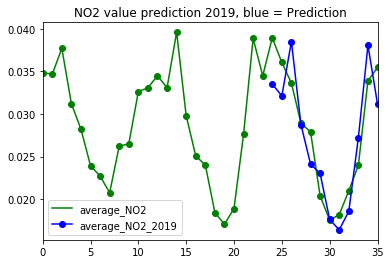

In [725]:
NO2ES = ExponentialSmoothing(NO2_avg_df[:24]['average_NO2'].values, trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()
forecast_pd = pd.DataFrame(NO2ES.forecast(12), index = range(24,36), columns = ['average_NO2_2019'])

ax = NO2_avg_df.plot(marker = 'o', color = 'green')
forecast_pd.plot(ax = ax, marker = 'o', color = 'blue')
plt.title('NO2 value prediction 2019, blue = Prediction', fontsize = 12)

C:\Users\hwang\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0, 0.5, 'NO2 Average Value')

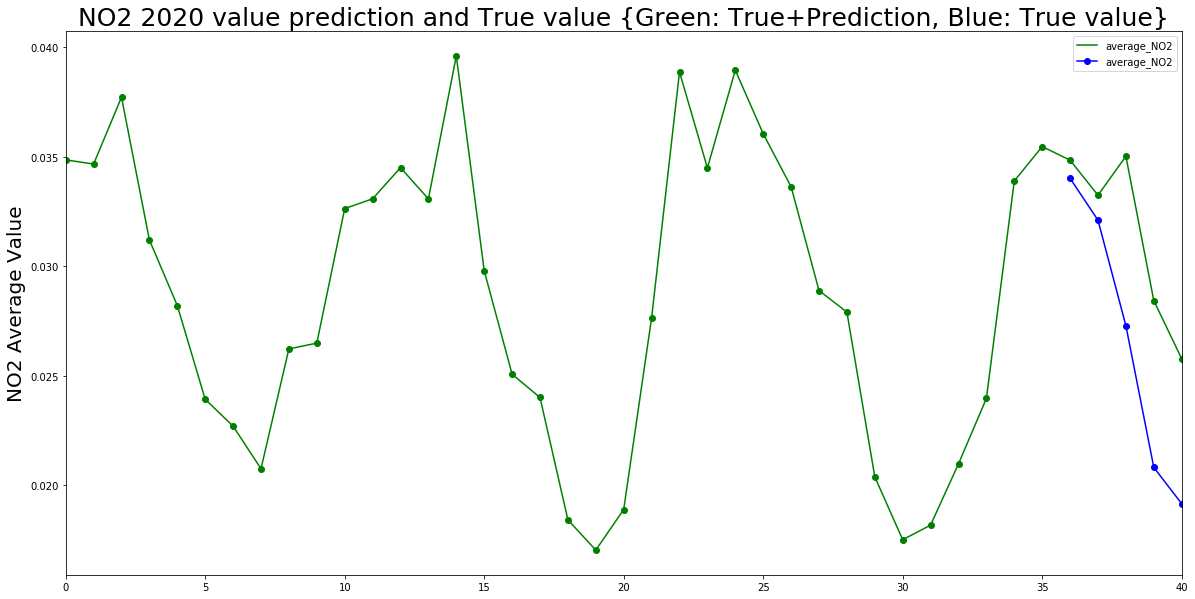

In [726]:
NO2_avg_df_2020 = pd.DataFrame()
NO2_avg_df_2020['time'] = time_2020
NO2_avg_df_2020['average_NO2'] = avg_contam_2020
NO2_avg_df_2020

NO2ES = ExponentialSmoothing(NO2_avg_df['average_NO2'].values, trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()
forecast_pd = pd.DataFrame(NO2ES.forecast(5), index = range(5), columns = ['average_NO2'])
NO2_avg_df = NO2_avg_df.append(forecast_pd).reset_index(drop=True)
NO2_avg_df_2020['new_index'] = [36, 37, 38, 39, 40]
NO2_avg_df_2020.set_index('new_index', drop=True, inplace=True)
ax = NO2_avg_df.plot(marker = 'o', color = 'green')
NO2_avg_df_2020.plot(ax = ax, marker = 'o', color = 'blue', figsize = (20,10))
plt.title("NO2 2020 value prediction and True value {Green: True+Prediction, Blue: True value}", fontsize = 25)
plt.xlabel('')
plt.ylabel("NO2 Average Value", fontsize = 20)

C:\Users\hwang\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, 'CO value prediction 2019, blue = Prediction')

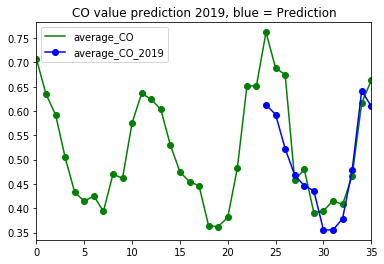

In [729]:
COES = ExponentialSmoothing(CO_avg_df[:24]['average_CO'].values, trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()
forecast_pd = pd.DataFrame(COES.forecast(12), index = range(24,36), columns = ['average_CO_2019'])

ax = CO_avg_df.plot(marker = 'o', color = 'green')
forecast_pd.plot(ax = ax, marker = 'o', color = 'blue')
plt.title('CO value prediction 2019, blue = Prediction', fontsize = 12)

Text(0, 0.5, 'CO Average Value')

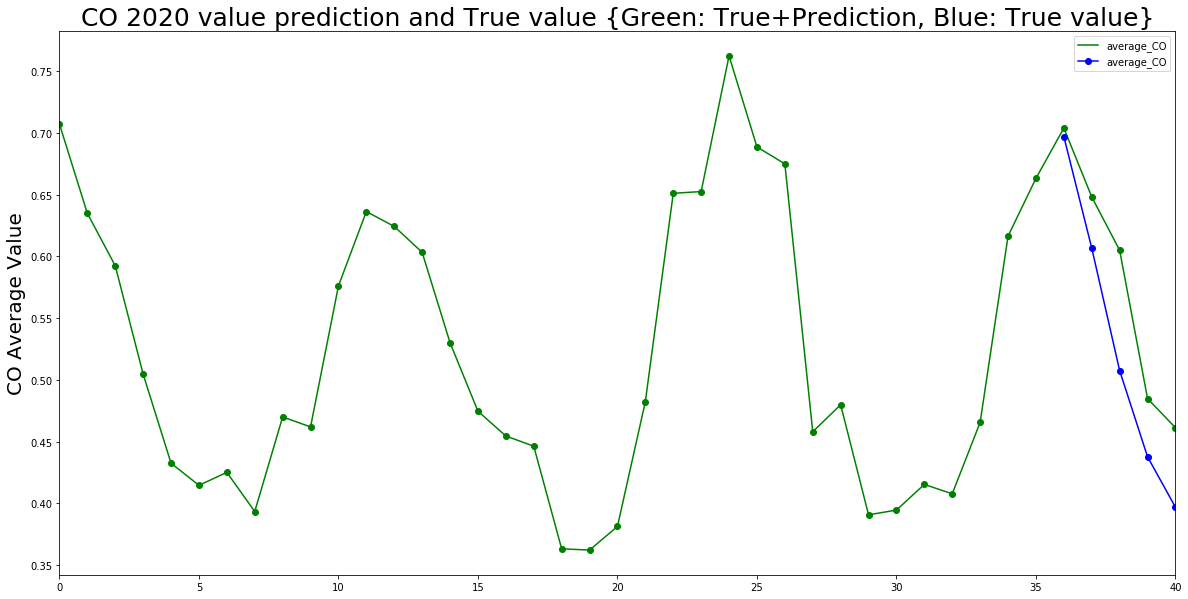

In [730]:
CO_avg_df_2020 = pd.DataFrame()
CO_avg_df_2020['time'] = time_2020
CO_avg_df_2020['average_CO'] = avg_contam_2020
CO_avg_df_2020

COES = ExponentialSmoothing(CO_avg_df['average_CO'].values, trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()
forecast_pd = pd.DataFrame(COES.forecast(5), index = range(5), columns = ['average_CO'])
CO_avg_df = CO_avg_df.append(forecast_pd).reset_index(drop=True)
CO_avg_df_2020['new_index'] = [36, 37, 38, 39, 40]
CO_avg_df_2020.set_index('new_index', drop=True, inplace=True)
ax = CO_avg_df.plot(marker = 'o', color = 'green')
CO_avg_df_2020.plot(ax = ax, marker = 'o', color = 'blue', figsize = (20,10))
plt.title("CO 2020 value prediction and True value {Green: True+Prediction, Blue: True value}", fontsize = 25)
plt.xlabel('')
plt.ylabel("CO Average Value", fontsize = 20)

C:\Users\hwang\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, 'O3 value prediction 2019, blue = Prediction')

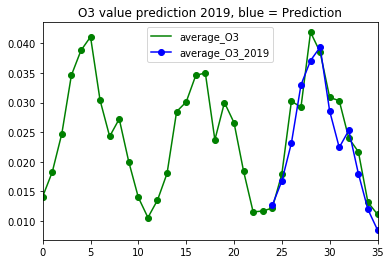

In [735]:
O3ES = ExponentialSmoothing(O3_avg_df[:24]['average_O3'].values, trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()
forecast_pd = pd.DataFrame(O3ES.forecast(12), index = range(24,36), columns = ['average_O3_2019'])

ax = O3_avg_df.plot(marker = 'o', color = 'green')
forecast_pd.plot(ax = ax, marker = 'o', color = 'blue')
plt.title('O3 value prediction 2019, blue = Prediction', fontsize = 12)

Text(0, 0.5, 'O3 Average Value')

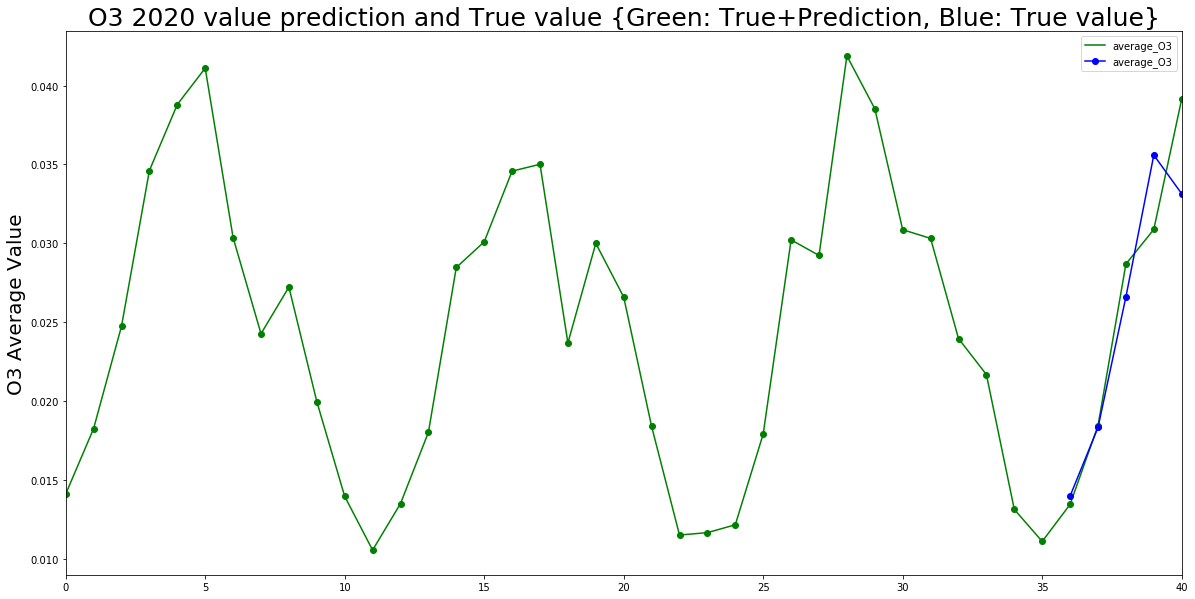

In [736]:
O3_avg_df_2020 = pd.DataFrame()
O3_avg_df_2020['time'] = time_2020
O3_avg_df_2020['average_O3'] = avg_contam_2020
O3_avg_df_2020

O3ES = ExponentialSmoothing(O3_avg_df['average_O3'].values, trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()
forecast_pd = pd.DataFrame(O3ES.forecast(5), index = range(5), columns = ['average_O3'])
O3_avg_df = O3_avg_df.append(forecast_pd).reset_index(drop=True)
O3_avg_df_2020['new_index'] = [36, 37, 38, 39, 40]
O3_avg_df_2020.set_index('new_index', drop=True, inplace=True)
ax = O3_avg_df.plot(marker = 'o', color = 'green')
O3_avg_df_2020.plot(ax = ax, marker = 'o', color = 'blue', figsize = (20,10))
plt.title("O3 2020 value prediction and True value {Green: True+Prediction, Blue: True value}", fontsize = 25)
plt.xlabel('')
plt.ylabel("O3 Average Value", fontsize = 20)

C:\Users\hwang\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, 'PM10 value prediction 2019, blue = Prediction')

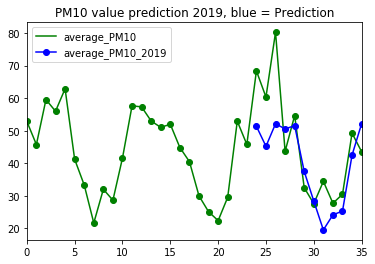

In [739]:
PM10ES = ExponentialSmoothing(PM10_avg_df[:24]['average_PM10'].values, trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()
forecast_pd = pd.DataFrame(PM10ES.forecast(12), index = range(24,36), columns = ['average_PM10_2019'])

ax = PM10_avg_df.plot(marker = 'o', color = 'green')
forecast_pd.plot(ax = ax, marker = 'o', color = 'blue')
plt.title('PM10 value prediction 2019, blue = Prediction', fontsize = 12)

C:\Users\hwang\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0, 0.5, 'PM10 Average Value')

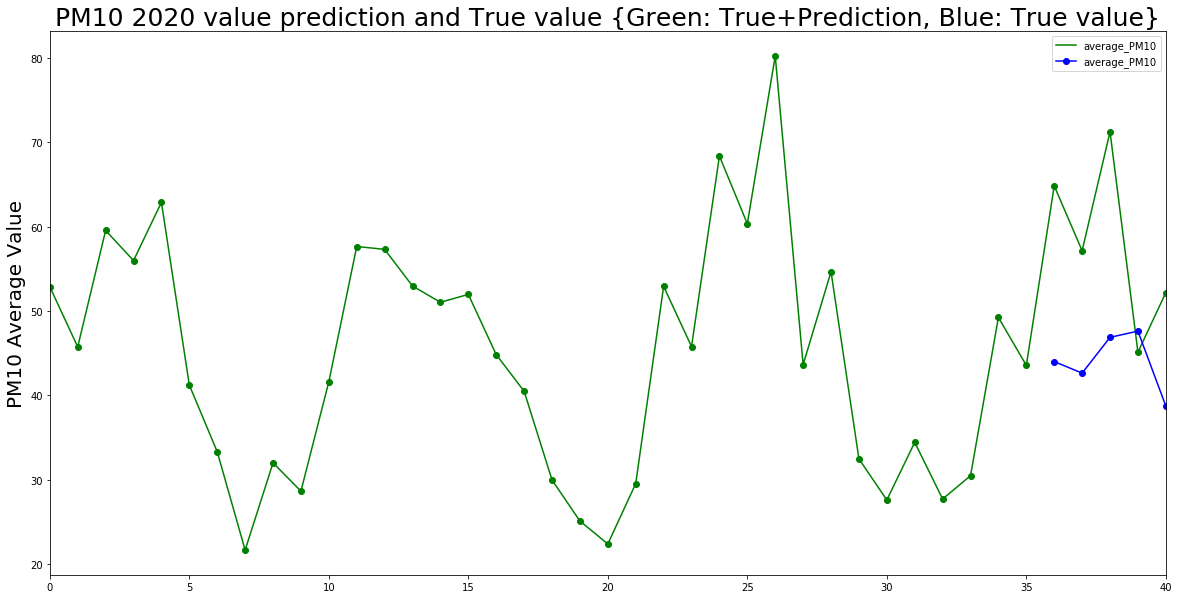

In [740]:
PM10_avg_df_2020 = pd.DataFrame()
PM10_avg_df_2020['time'] = time_2020
PM10_avg_df_2020['average_PM10'] = avg_contam_2020
PM10_avg_df_2020

PM10ES = ExponentialSmoothing(PM10_avg_df['average_PM10'].values, trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()
forecast_pd = pd.DataFrame(PM10ES.forecast(5), index = range(5), columns = ['average_PM10'])
PM10_avg_df = PM10_avg_df.append(forecast_pd).reset_index(drop=True)
PM10_avg_df_2020['new_index'] = [36, 37, 38, 39, 40]
PM10_avg_df_2020.set_index('new_index', drop=True, inplace=True)
ax = PM10_avg_df.plot(marker = 'o', color = 'green')
PM10_avg_df_2020.plot(ax = ax, marker = 'o', color = 'blue', figsize = (20,10))
plt.title("PM10 2020 value prediction and True value {Green: True+Prediction, Blue: True value}", fontsize = 25)
plt.xlabel('')
plt.ylabel("PM10 Average Value", fontsize = 20)